In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
df = pd.read_csv("beverage_sales.csv", encoding='latin1')
df

,Temperature (°C),Promotion,Beverage Sales
0,33,1,184.462555
1,19,1,123.129571
2,12,1,70.459383
3,25,1,135.463954
4,23,1,124.307494
...,...,...,...
995,29,0,148.014205
996,7,0,42.576629
997,34,0,169.924846
998,16,0,83.546176


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature (°C)  1000 non-null   int64  
 1   Promotion         1000 non-null   int64  
 2   Beverage Sales    1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [124]:
df.describe()

,Temperature (°C),Promotion,Beverage Sales
count,1000.000000,1000.000000,1000.000000
mean,21.370000,0.702000,121.052816
std,9.820873,0.457608,50.674022
min,5.000000,0.000000,7.997951
25%,13.000000,0.000000,78.832509
50%,22.000000,1.000000,121.609387
75%,30.000000,1.000000,161.906720
max,37.000000,1.000000,228.637179


In [125]:
cols = ['Temperature (°C)', 'Promotion', 'Beverage Sales']
df.rename(columns = {cols[0]:0, cols[1]:1, cols[2]:2}, inplace=True)
df

,0,1,2
0,33,1,184.462555
1,19,1,123.129571
2,12,1,70.459383
3,25,1,135.463954
4,23,1,124.307494
...,...,...,...
995,29,0,148.014205
996,7,0,42.576629
997,34,0,169.924846
998,16,0,83.546176


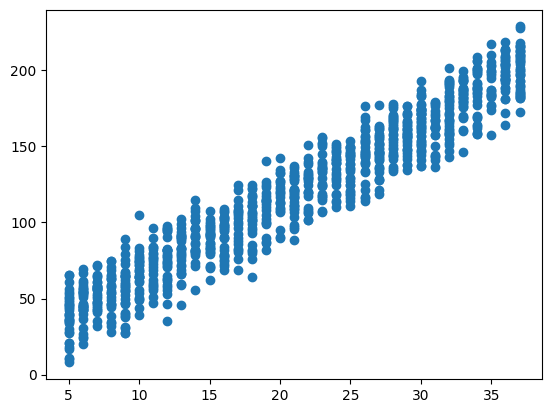

In [126]:
plt.scatter(df[0], df[2])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1551fc99370>,
 'caps': [<matplotlib.lines.Line2D at 0x1551fc998b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1551fc990d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1551fc99df0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1551fd490d0>,
 'means': []}

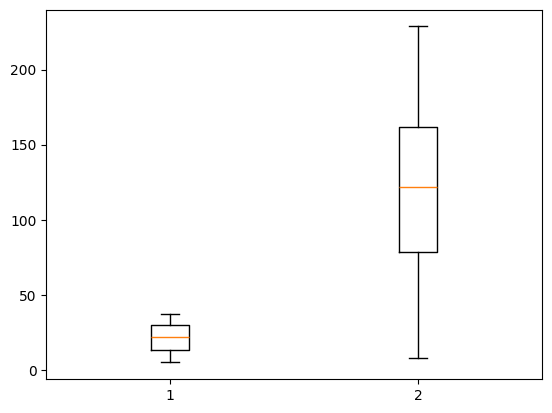

In [127]:
plt.boxplot([df[0],df[2]])

In [128]:
corr = df.corr()
corr

,0,1,2
0,1.000000,-0.028007,0.964231
1,-0.028007,1.000000,0.153245
2,0.964231,0.153245,1.000000


<Axes: >

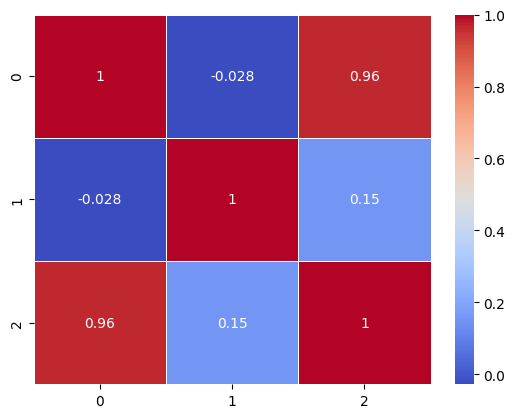

In [129]:
sns.heatmap(corr,annot=True,cmap="coolwarm",linewidths=0.5)

In [130]:
print(df.columns)

Index([0, 1, 2], dtype='int64')


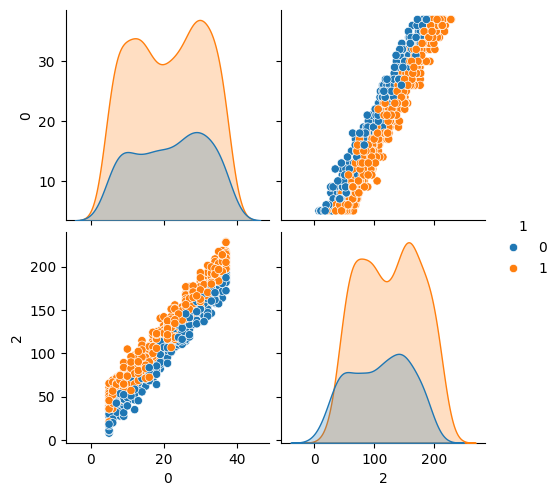

In [131]:
sns.pairplot(df,hue=1, diag_kind="kde")

In [135]:
df.columns = ['Temperature', 'Promotion', 'Sales']

In [143]:
def loss_function(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i].df[0]
        y = points.iloc[i].df[2]
        total_error += (y - (m*x +b))**2
    total_error / float(len(points))

In [154]:
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0

    n= len(points)

    for i in range(n):
        x = points.iloc[i]['Temperature']
        y = points.iloc[i]['Sales']

        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))

    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b


epochs: 0
epochs: 50
epochs: 100
epochs: 150
epochs: 200
epochs: 250
5.530591752164286 0.3647509230053337


<function matplotlib.pyplot.show(close=None, block=None)>

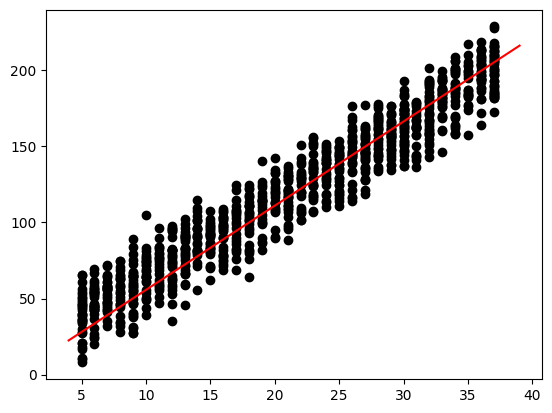

In [155]:
m = 0
b = 0
L = 0.0001
epochs = 300

for i in range(epochs):
    if i % 50 == 0:
        print(f"epochs: {i}")
    m, b = gradient_descent(m, b, df, L)

print(m, b)

plt.scatter(df['Temperature'], df['Sales'], color="black")

x_vals = list(range(4, 40))  # or use np.linspace if you want smoother line
y_vals = [m * x + b for x in x_vals]

plt.plot(x_vals, y_vals, color='red')
plt.show